# Insurance

Consider the data present in the Insurance dataset file.<br>

Following is the attribute related information:<br>

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body <br>  weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking, yes or no
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance<br>

### Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import skew
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
import statsmodels.api as sma

#### Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data = pd.read_csv(r"datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Understanding the problem statement and the data. Trying to understand the importance of each variable given.<br>
Performing Exploratory Data Analysis- Datatypes, Dimension and Descriptive Statistics.

In [3]:
print("data.describe(): \n", data.describe(), "\n\n") # [include="all"] for categorical variables.
print("data.describe(): \n", data.describe(include="all"), "\n\n")
print("data.dtypes(): \n", data.dtypes, "\n\n")
print("data.shape():", data.shape, "\n\n")
print()

data.describe(): 
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 


data.describe(): 
                 age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN     

* Here we see that we have 1338 rows and 7 columns
* We have 3 categorical columns which need to be converted to numeric/flags
* Charges has a very high standard deviation, compared to other fields.

#### Checking if there are missing values. If yes, we will handle them.

In [4]:
data.isnull().sum()
# No null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data_numeric = ['age', 'bmi', 'charges']
data_X = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

Checking for Assumption 1- 
## There should be no outliers in the data.

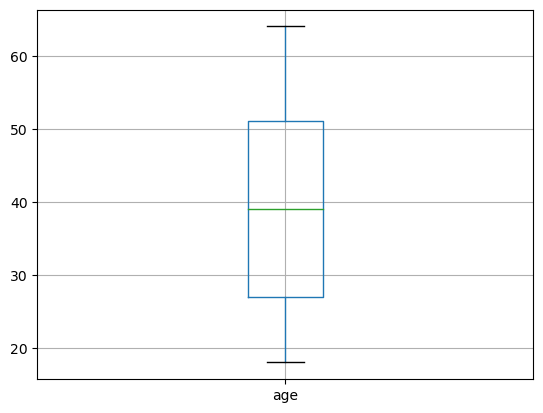

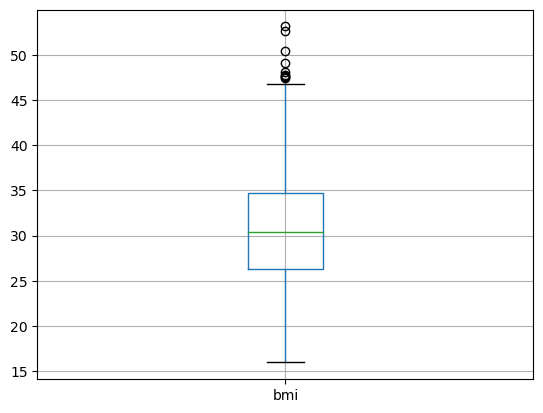

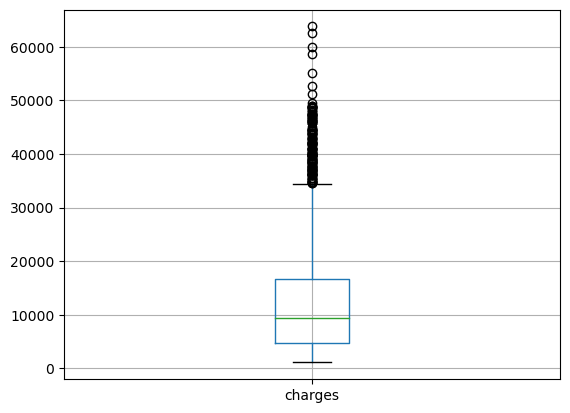

In [7]:
for i in data_numeric:
    data.boxplot(column=i)
    plt.show()

* If we think logically, nothing needs to be worked upon here.
* We see that the fields - bmi and charges have outliers(clustered)

Checking for Assumption 2-
## Assumption of Linearity<br>
We use kind="scatter" in the pairplot. Some Features might show no relationship, but they are categorical and important variables, so we leave it as it is.

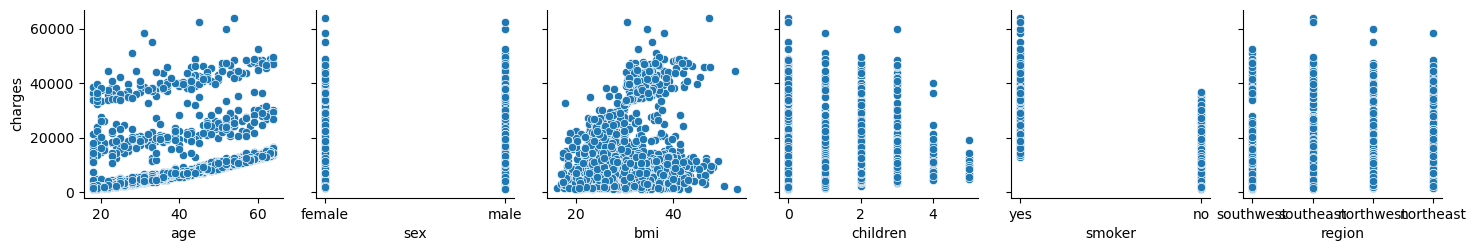

In [8]:
sns.pairplot(data, x_vars=data_X,
            y_vars="charges", kind='scatter')
plt.show()

Creating X(Independent Variables) and Y(Dependent Variables)

In [9]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [10]:
print(X.shape, "\n")
print(Y.shape)

(1338, 6) 

(1338,)


* X has 1338 rows and 6 independent columns
* Y has 1338 rows and 1 dependent columns

Checking for Assumption 3-
## Assumption of Normality

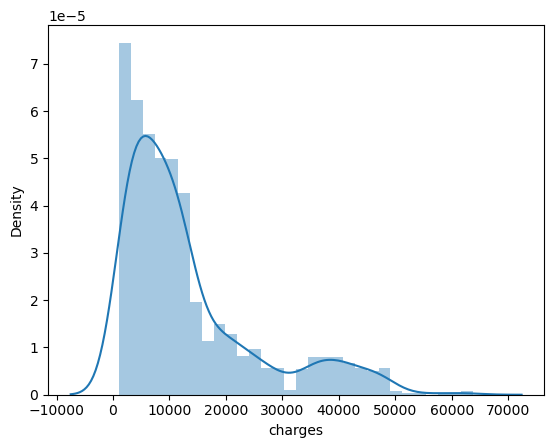

In [11]:
# Assumption of Normality: The dependent variable should follow an approximate normal distribution

sns.distplot(Y)
plt.show()

We find that the data is highly positively skewed. So, we log transform the data.

In [12]:
Y_log = np.log(Y)

(1338,)


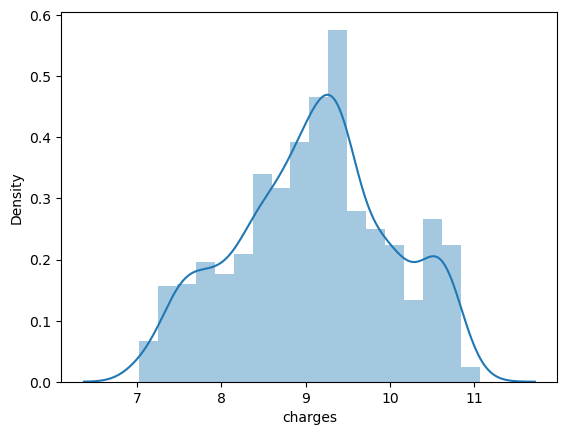

In [13]:
print(Y_log.shape)
sns.distplot(Y_log, hist=True)
plt.show()

We confirm that the distribution curve has improved due to log transformation.

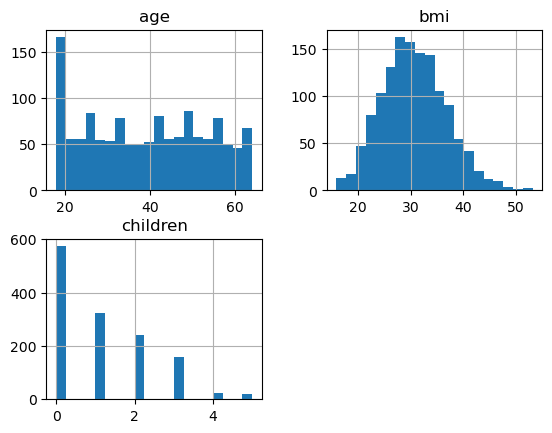

In [14]:
X.hist(bins=20)
plt.show()
# histograms are only created for continuous numeric variables and not categorical

#### Converting Categorical variables to numerical- Sex, Smoker and Region<br>
We will make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

In [15]:
data.sex.replace({"female":0,"male":1}, inplace=True)
data.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [16]:
data.smoker.replace({"no":0,"yes":1}, inplace=True)
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [17]:
data.region.replace({"northeast":0,"northwest":1,"southeast":2,"southwest":3}, inplace=True)
data.region.value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

#### Checking for normality in the X variables.

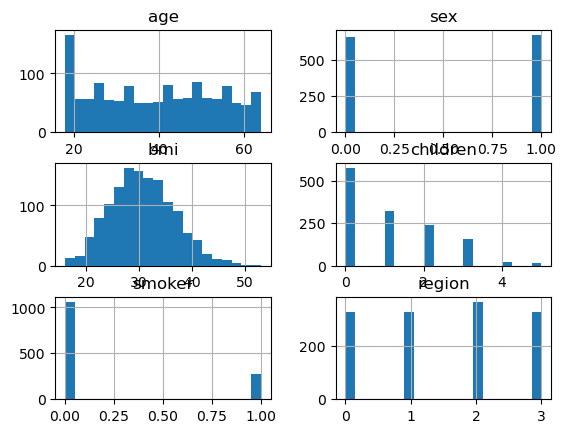

In [18]:
X = data.loc[:,data_X]
X.hist(bins=20)
plt.show()

Some variables do not look normal because they are actually, discrete valued. No transformation is required.

### Checking for skewness in the data

In [19]:
#from scipy.stats import skew

# Finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))   # apply will iterate through X, 'i' will take each column once

# Subsetting the variabls that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew, "\n\n")
print(data_num_skewed)

age         0.055610
sex        -0.020928
bmi         0.283729
children    0.937328
smoker      1.463124
region     -0.038058
dtype: float64 


children    0.937328
smoker      1.463124
dtype: float64


Smoker and children has high skewness but they are not continuous and hence, we do not do perform a log transformation.

Checking for Assumption 4-
## No multicollinearity in the data<br>
We will try both the approaches-correlation and VIF.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


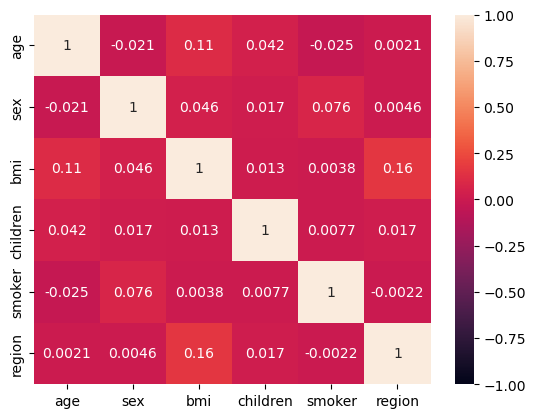

In [20]:
# Correlation approach

corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True) 
plt.show()

We find no high correlation.

In [21]:
vif_df = pd.DataFrame()
vif_df["features"] = X.columns

vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.sort_values("VIF Factor",ascending=False, inplace=True)

vif_df.round(2)

,features,VIF Factor
2,bmi,10.37
0,age,7.55
5,region,2.92
1,sex,2.00
3,children,1.80
4,smoker,1.26


* Even though some variables(bmi,age), show high VIF, we can not remove/drop them as they are a very important factor, as per the domain knowledge.

#### Splitting the data into train and test.<br>
We will make sure to use the log transformed Y.

In [22]:
# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2, random_state=10)

# We have a log-level Model (only y is log transformed)

In [23]:
# 80% Data for training
print("Shape of X_train:", X_train.shape)  # 1070 rows, 6 dependent col
print("Shape of Y_train:", Y_train.shape, "\n")  # 1070 rows, 1 col


# 20% Data for testing.
print("Shape of X_test:", X_test.shape)   # 268 rows, 6 dependent col
print("Shape of Y_test:", Y_test.shape, "\n")   # 268 rows, 1 col

# Printing Percentage of train data => 80%
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

Shape of X_train: (1070, 6)
Shape of Y_train: (1070,) 

Shape of X_test: (268, 6)
Shape of Y_test: (268,) 

Percent of train data 79.97010463378177


#### Building a base Linear Regression model using sklearn.

In [24]:
# Create=ing a model object
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

# Printing the intercept and coefficients (Parameters)
print(lm.intercept_)
print(lm.coef_)

6.998797622591983
[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


#### Creating a zipped list of the slope coefficients to understand the equation better.

In [25]:
# Pairing the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('age', 0.034988341490764935), ('sex', -0.07113220005343047), ('bmi', 0.012591262605123998), ('children', 0.09962976583044039), ('smoker', 1.5693443019666664), ('region', -0.038891518199588485)]


* "sex" variable has a minus coefficient, which means that when sex is male(1), the charges decrease and vice-versa.
* "smoker" variable has high coefficient(1.5), which means that smoker's insurance charges is higher than non smokers.

#### Predicting using the model.

In [26]:
Y_pred = lm.predict(X_test) # 268 observations (X) will give 268 predicted (Y) values in output.

#### Evaluating the model.

In [27]:
r2=r2_score(Y_test,Y_pred)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_log)-1)/(len(Y_log)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
0.4882327185684707
Adj R-square: 0.703623414730595


#### Performing Ridge and Lasso regression and evaluating them as well.

In [28]:
# Ridge Model

#from sklearn.linear_model import Ridge

# Creating a Ridge model object

ridge = Ridge()
ridge.fit(X_train, Y_train)

# Making predictions on the testing set
Y_pred_ridge = ridge.predict(X_test)

r2=r2_score(Y_test,Y_pred_ridge)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_log)-1)/(len(Y_log)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166417
RMSE: 0.4879680970393756
Adj R-square: 0.7039445991509017


In [29]:
# Lasso Model

#from sklearn.linear_model import Lasso

# Create a Lasso model object

lasso = Lasso()
lasso.fit(X_train, Y_train)

# Making predictions on the testing set
Y_pred_lasso = lasso.predict(X_test)

r2=r2_score(Y_test,Y_pred_lasso)  # R-Square value
print("R-squared:",r2)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y_log)-1)/(len(Y_log)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


In [30]:
# print intercept and coefficients
print(lasso.intercept_)
print(lasso.coef_)
# To check, which coefficients(B0) values were made zero(0) at the backend.

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


##### Lasso has eliminated all columns except for 1 column-(age), hence we can not choose this model.
Lasso usually does not work very well, when there are categorical variables.

Linear:  
R-squared:    0.7049534517624696  
RMSE:         0.4882327185684707  
Adj R-square: 0.703623414730595  
  
Ridge:  
R-squared:    0.7052731948166417  
RMSE:         0.4879680970393756  
Adj R-square: 0.7039445991509017  
  
Lasso:  
R-squared:    0.21387850856962531  
RMSE:         0.7969415049819164  
Adj R-square: 0.21033476029871445

Here we can conclude that Ridge model gives us the highest R-square and adjusted r-squared values and the minimum RMSE.

In [31]:
# Creating a DataFrame for test data and predicted charges.

new_ridge_df=pd.DataFrame()
new_ridge_df=X_test.copy()

new_ridge_df["Actual charges"]=Y_test
new_ridge_df["Predicted charges"]=Y_pred_ridge
new_ridge_df=new_ridge_df.reset_index().drop("index", axis=1)
new_ridge_df["Deviation"] = abs(new_ridge_df["Actual charges"] - new_ridge_df["Predicted charges"])
new_ridge_df.head()

,age,sex,bmi,children,smoker,region,Actual charges,Predicted charges,Deviation
0,37,0,27.740,3,0,1,8.893093,8.903838,0.010745
1,36,0,26.885,0,0,1,8.569372,8.559524,0.009848
2,59,1,37.100,1,0,3,9.421182,9.444323,0.023141
3,61,0,25.080,0,0,2,10.106963,9.372542,0.734420
4,29,0,26.030,0,0,1,8.225895,8.303866,0.077970


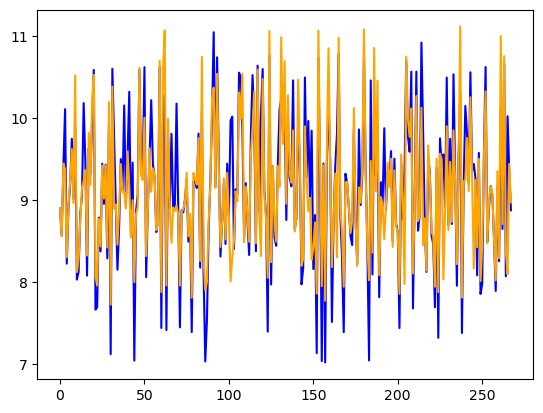

In [32]:
# Graphical representation.

new_ridge_df["Actual charges"].plot(color='blue')
new_ridge_df["Predicted charges"].plot(color='orange')
plt.show()

#### Creating a sample dataframe to hold just the training data for the OLS model.

In [33]:
new_ols_df=pd.DataFrame()
new_ols_df=X_train.copy()

new_ols_df["Actual_charges"]=Y_train
new_ols_df=new_ols_df.reset_index().drop("index", axis=1)

#### Building OLS model using statsmodels library. We will check the summary to evaluate.<br>

Checking for the Assumption 5- 
## No autocorrelation 

In [34]:
#import statsmodels.formula.api as sm
ols = sm.ols('Actual_charges~age+sex+bmi+children+smoker+region',data=new_ols_df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:         Actual_charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:22:06   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9988      0.075     93.073      0.0

* Here we see that Durbin-Watson: 2.062 (close to 2), hence we conclude that there is no auto-correlation.
* The ablove model is done on the training data.

Checking for Assumption 6-
## Errors should be random.

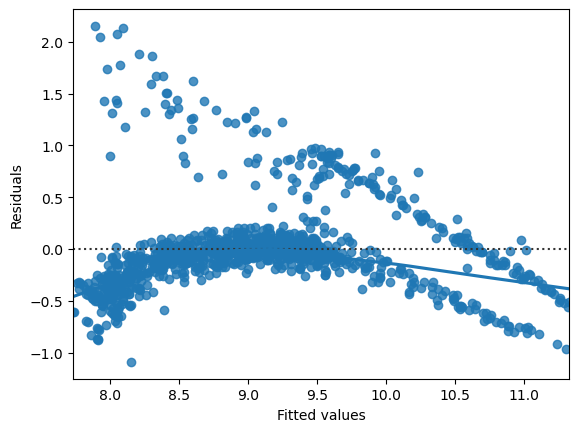

In [35]:
# Assumption: Errors should be random
# Checked using Residual v/s Fitted plot

model_fitted_y = ols.fittedvalues
sns.residplot(x=model_fitted_y, y='Actual_charges', data=new_ols_df, lowess=True)  # lowess=True is to plot the curved line.
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# The line should be a random line and should not follow a wave like pattern.

Checking for Assumption 7-
## Errors should follow normal distribution.

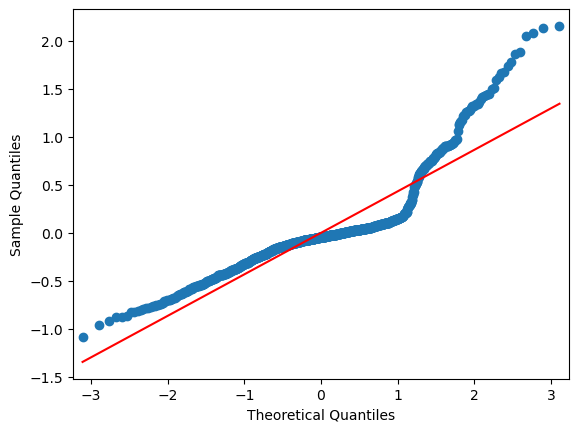

In [36]:
# Assumption: Errors should follow an approximate normal distribution
# Checked using Normal QQ plot (Quantile-Quantile Plot).

#import statsmodels.api as sma
sma.qqplot(ols.resid, line='s')  # line='s' > standardized line
plt.show()
# The error points should follow the red diagonal line, if not, then the errrors are skewed.

Checking for Assumption 8-
## Errors should follow constant variance.

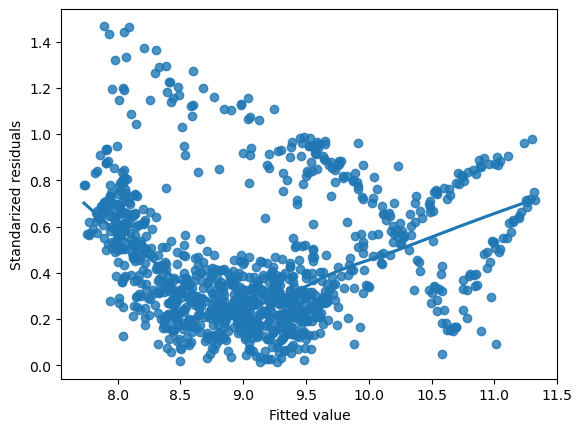

In [37]:
# Assumption: Errors should follow a constant variance-->Homoskedasticity
# checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(ols.resid))

sns.regplot(x=ols.fittedvalues, y=model_norm_residuals_abs_sqrt, scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

# if steep curve, then the errors do not follow a standard variance.

#### Now that we have finalized the model, we will try predicting the following observations.<br>
Creating a dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data=  
{"age":[56,51,31,64,44,43,56],  
             "sex":[1,0,1,1,0,1,1],  
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],  
             "children":[0,0,3,2,2,2,0],  
             "smoker":[1,0,1,0,0,0,0],  
             "region":[0,1,1,3,2,3,1]}

In [38]:
sample_data={"age":[56,51,31,64,44,43,56], 
             "sex":[1,0,1,1,0,1,1], 
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], 
             "children":[0,0,3,2,2,2,0],
             "smoker":[1,0,1,0,0,0,0],
             "region":[0,1,1,3,2,3,1]}

In [39]:
X_test_sample = pd.DataFrame(sample_data)
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


In [40]:
Y_pred_sample = ridge.predict(X_test_sample)
Y_pred_sample

array([10.70073159,  8.97304448, 10.26763652,  9.57396116,  8.96299492,
        8.92742692,  9.27508878])

#### The predicted values are log transformed, so we convert them back to original values using np.exp()

In [41]:
Y_pred = np.exp(Y_pred_sample)
Y_pred

array([44388.31731204,  7887.57862613, 28785.77219046, 14385.28600088,
        7808.70890381,  7535.85009894, 10668.90567122])

#### We will save the predicted values along with the observations into an excel file.

In [42]:
new_df=pd.DataFrame()
new_df=X_test_sample.copy()

new_df["Predicted charges"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

new_df

,age,sex,bmi,children,smoker,region,Predicted charges
0,56,1,19.950,0,1,0,44388.317312
1,51,0,18.050,0,0,1,7887.578626
2,31,1,34.390,3,1,1,28785.772190
3,64,1,25.600,2,0,3,14385.286001
4,44,0,23.980,2,0,2,7808.708904
5,43,1,32.600,2,0,3,7535.850099
6,56,1,33.725,0,0,1,10668.905671


In [43]:
new_df.to_excel("Insurance Prediction.xlsx", header=True, index=True)

### End of Project